# Breadth-First Search&Depth-First Search

## 參考資料
* 原理:
  * https://zh.wikipedia.org/wiki/%E5%B9%BF%E5%BA%A6%E4%BC%98%E5%85%88%E6%90%9C%E7%B4%A2
  * https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/102866/#outline__1
  * https://zh.wikipedia.org/wiki/%E6%B7%B1%E5%BA%A6%E4%BC%98%E5%85%88%E6%90%9C%E7%B4%A2
* 概念:
  * https://www.youtube.com/watch?v=QkEOGoUar3g
* 程式碼:
  * https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/
  * http://www.plexinfo.com/2017/08/bfs-implementation-in-python.html
  * http://f74461036.pixnet.net/blog/post/352335176

## BFS(廣度優先搜尋)、DFS(深度優先搜尋)

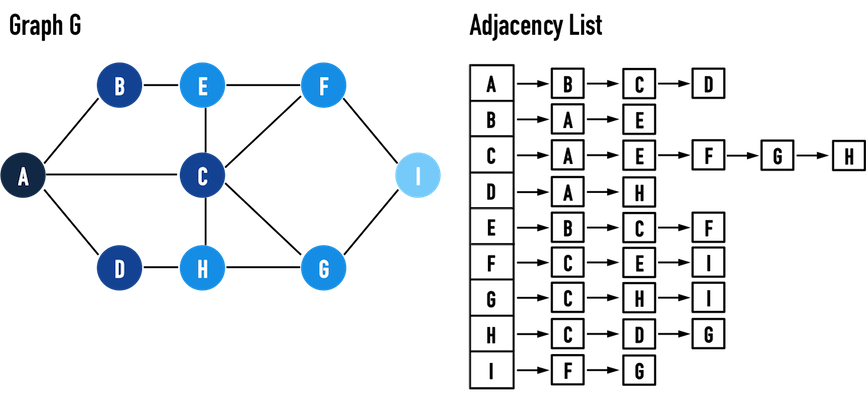

In [5]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename = "D:\三上-資料結構與演算法\BFS圖.png", width=550, height=500)

## BFS與DFS原理與比較
* 空間複雜度
  * BFS空間複雜度為O(|V|+|E|)，|V|是節點數目，|E|是圖中邊的數目
  * DFS空間複雜度為O(bm)，b為分支係數，m為圖的最大深度
* 時間複雜度
  * BFS時間複雜度為O(|V|+|E|)，|V|是節點數目，|E|是圖中邊的數目
  * DFS時間複雜度為O(b^m)，b為分支係數，m為圖的最大深度
* 使用方式
  * BFS是使用Queue
  * DFS是使用Stack
* 定義
  * BFS是從根節點開始，遍歷完畢整張圖，不考慮結果所在的位置， 無論如何都要遍歷完畢整張地圖才終止。 按照就近原則進行， 距離原點相同的節點的訪問順序是相近的。
  * DFS是從根節點開始， 逐個訪問每一條路徑， 對於具有多子節點的節點而言，先搜尋到某一條子路的最深處，再逐個回溯前驅節點。
* 節點儲存方式
  * 在DFS中，使用佇列儲存節點，而在BFS中，使用棧儲存節點。原因就在於二者優先次序的不同。佇列是一種先進先出的資料結構，對於每一個節點而言，每一次搜尋，都是優先這一個節點的子節點，所以每一次加入等待序列之後，都要等到某一個節點的所有子節點都被訪問完畢，才可以進行下一個節點的訪問，這正好是，先進入等待序列的節點，先出序列進行計算，而後進入的，則後出，所以使用佇列儲存。棧是一種先進後出的資料結構，在DFS中，我們要對每一條路徑走到底，才可以回溯前驅節點，所以當節點加入等待序列之後，都要先讓後加入的（也就是子節點中的某一個）節點先進行運算，以保證是一條路走到底，所以符合棧的設計。

## BFS流程圖

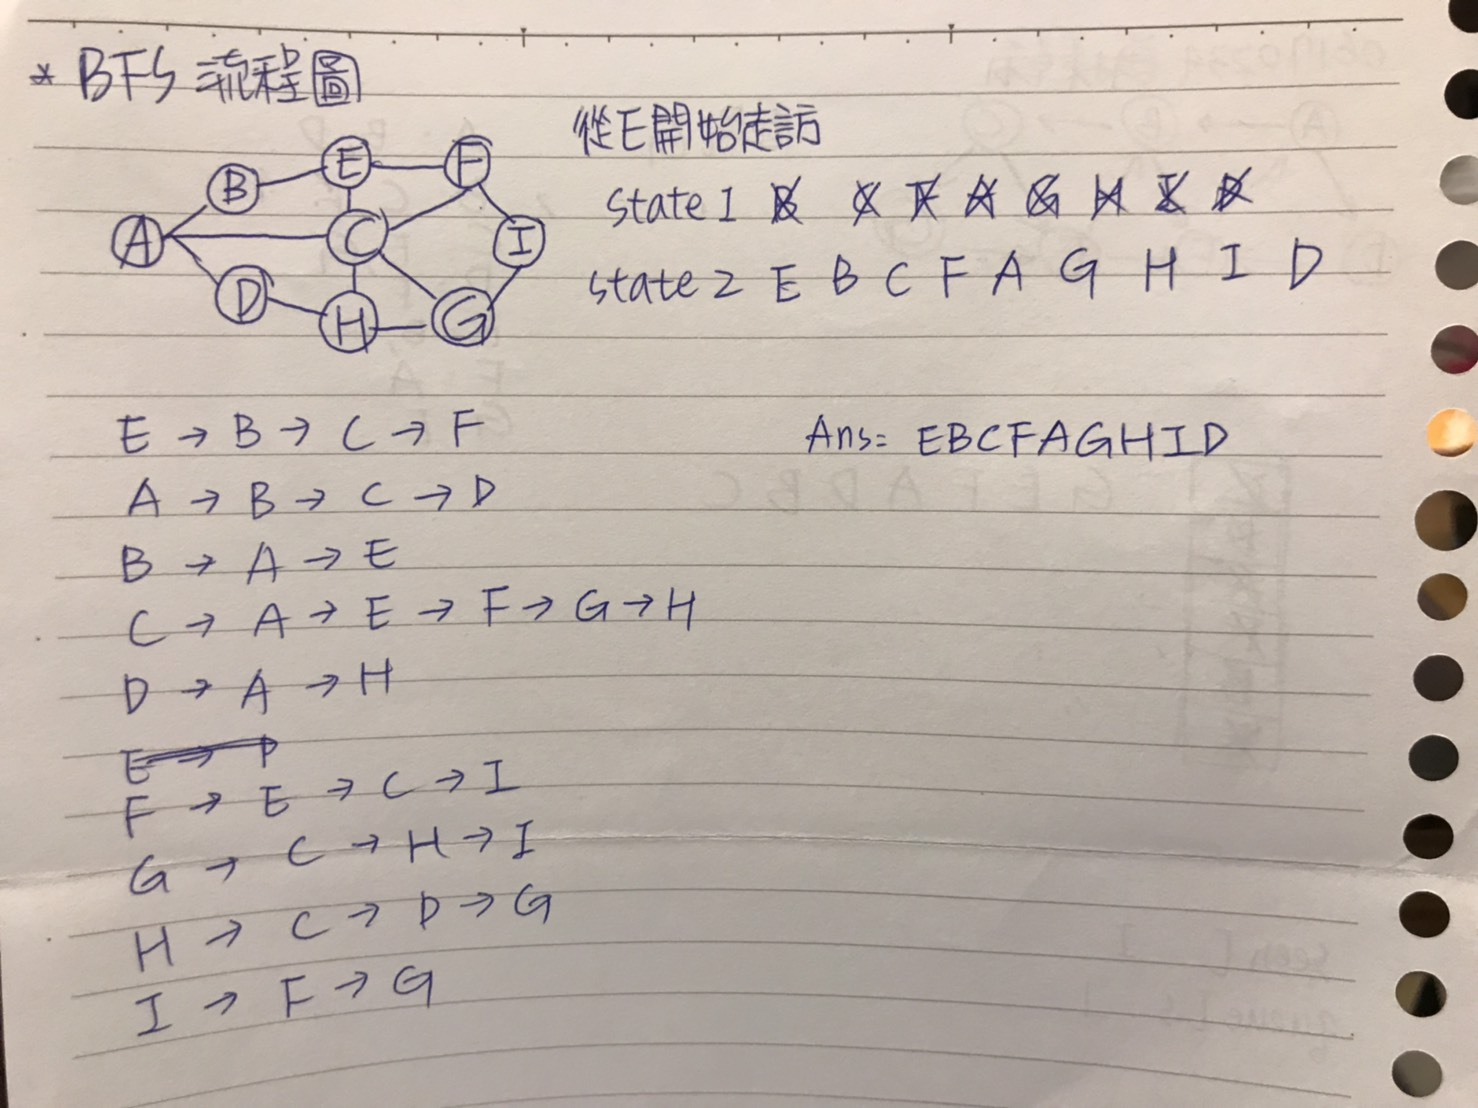

In [3]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename = "D:\三上-資料結構與演算法\BFS流程圖.jpg", width=550, height=500)

## DFS流程圖

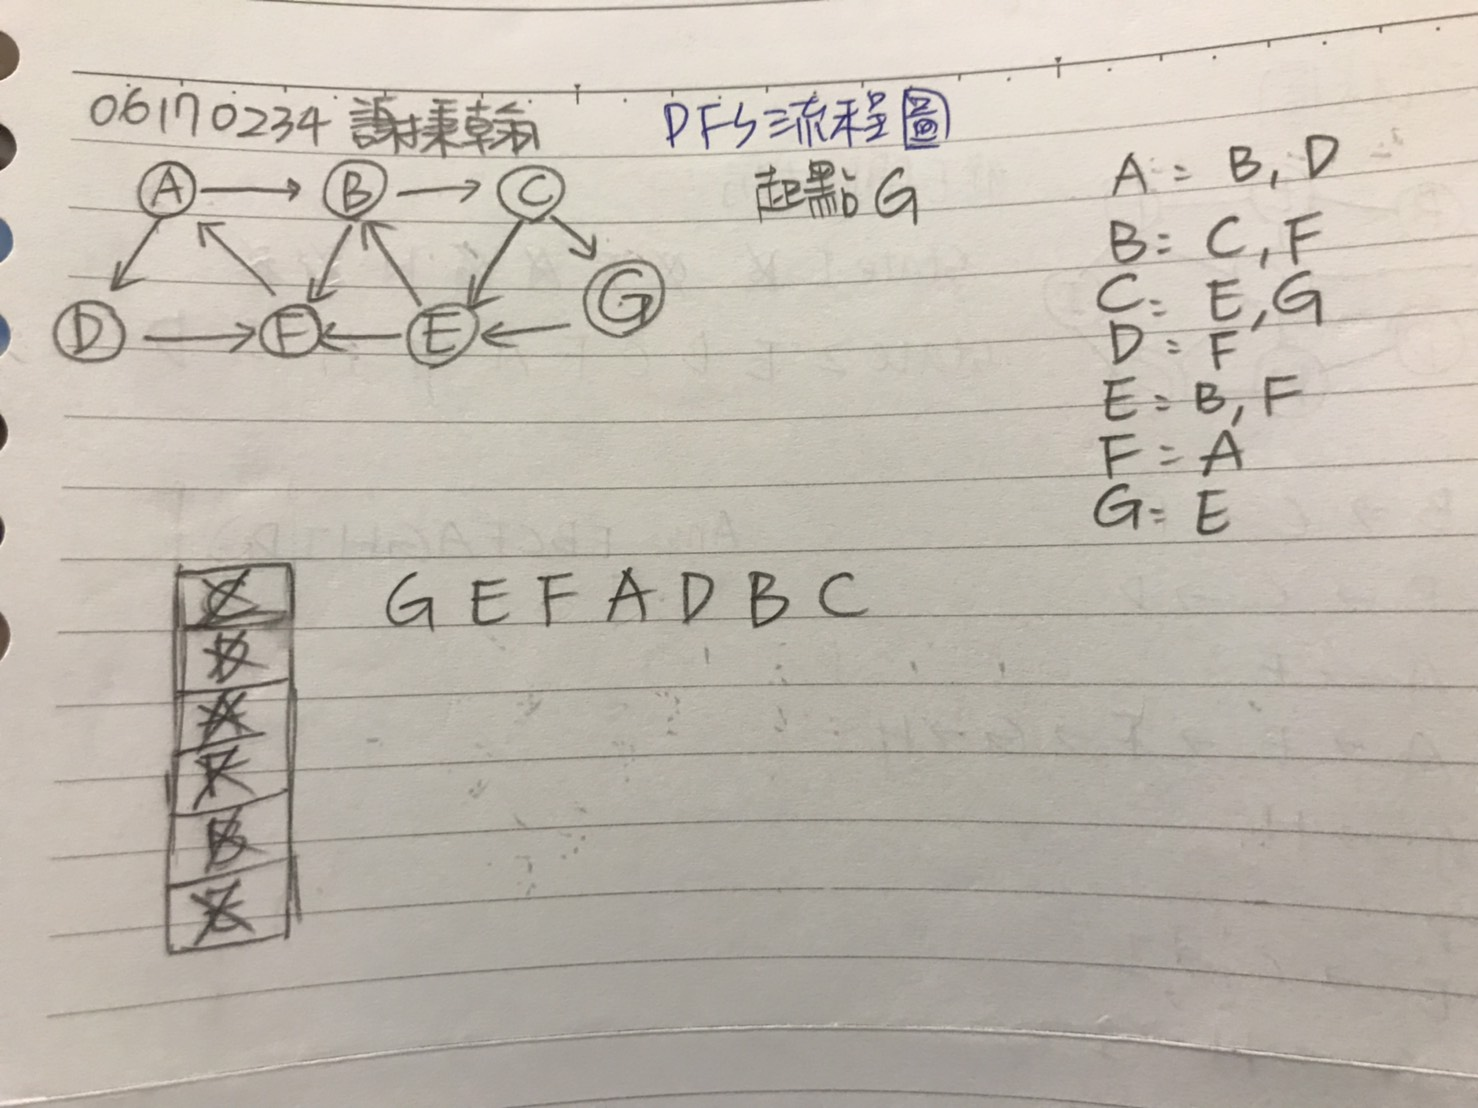

In [4]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename = "D:\三上-資料結構與演算法\DFS流程圖.jpg", width=550, height=500)

下載程式範例

In [1]:
# Python3 Program to print BFS traversal 
# from a given source vertex. BFS(int s) 
# traverses vertices reachable from s. 
from collections import defaultdict 
  
# This class represents a directed graph 
# using adjacency list representation 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list) 

    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v)
  
    # Function to print a BFS of graph 
    def BFS(self, s): 
        """
        :type s: int
        :rtype: list
        """
    def DFS(self, s):
        """
        :type s: int
        :rtype: list
        """

測值:

In [14]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)

先從BFS開始著手

In [5]:
from collections import defaultdict
  
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
 
    def addEdge(self,u,v): 
        self.graph[u].append(v)
   
    def BFS(self, s):
        seen = []
        queue = []
        queue.append(s)
        
        while (len(queue)>0):
            current_node = queue.pop(0)
            near = self.graph[current_node]
            for w in near:
                if current_node not in seen:
                    seen.append(current_node)
                    queue.append(w)
        return seen

In [6]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
print(g.BFS(2))

[2, 0, 1]


顯示結果應該為[2,0,3,1]

這邊的結果少一個值，且排序位置錯誤，或是3沒放進1前面

In [6]:
from collections import defaultdict
  
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
 
    def addEdge(self,u,v): 
        self.graph[u].append(v)
   
    def BFS(self, s):
        seen = []
        queue = []
        queue.append(s)
        
        while (len(queue)>0):
            current_node = queue.pop(0)
            near = self.graph[current_node]
            if current_node not in seen:
                seen.append(current_node)
                while (len(near)>0):
                    number = near.pop()
                    queue.append(number)
        return seen

In [7]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
print(g.BFS(2))

[2, 3, 0, 1]


順序還是錯的

後來發現問題在於我的number在pop時沒有把要pop的值設定在(0)的位置

In [3]:
from collections import defaultdict
  
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
 
    def addEdge(self,u,v): 
        self.graph[u].append(v)
   
    def BFS(self, s):
        seen = []
        queue = []
        queue.append(s)
        
        while (len(queue)>0):
            current_node = queue.pop(0) #第一個點為要看的點
            near = self.graph[current_node] #要看的點的鄰點
            if current_node not in seen: #如果點還沒在seen裡，就加進去(seen是走訪過的[])
                seen.append(current_node)
                while (len(near)>0): #把鄰點加進queue裡，做迴圈
                    number = near.pop(0)
                    queue.append(number)
            else:
                pass
        return seen

In [4]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
print(g.BFS(2))

[2, 0, 3, 1]


多試一點測值

In [5]:
g = Graph() 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 0) 
g.addEdge(1, 2)
g.addEdge(1, 3) 
g.addEdge(2, 0) 
g.addEdge(2, 2) 
g.addEdge(2, 3) 
g.addEdge(3, 1) 
g.addEdge(3, 2) 
g.addEdge(3, 4) 
g.addEdge(3, 5) 
g.addEdge(4, 2) 
g.addEdge(4, 3) 
g.addEdge(5, 3) 
print(g.BFS(4))

[4, 2, 3, 0, 1, 5]


In [6]:
g = Graph()
g.addEdge(11,10)
g.addEdge(10,9)
g.addEdge(10,11)
g.addEdge(10,6)
g.addEdge(9,4)
g.addEdge(9,7)
g.addEdge(9,10)
g.addEdge(6,10)
g.addEdge(7,9)
g.addEdge(7,4)
g.addEdge(7,2)
g.addEdge(7,5)
g.addEdge(7,8)
g.addEdge(8,7)
g.addEdge(8,5)
g.addEdge(8,2)
g.addEdge(5,8)
g.addEdge(5,7)
g.addEdge(5,2)
g.addEdge(5,12)
g.addEdge(5,3)
g.addEdge(2,3)
g.addEdge(2,4)
g.addEdge(2,7)
g.addEdge(2,8)
g.addEdge(2,5)
g.addEdge(2,12)
g.addEdge(4,1)
g.addEdge(4,2)
g.addEdge(4,7)
g.addEdge(4,9)
g.addEdge(3,1)
g.addEdge(3,2)
g.addEdge(3,5)
g.addEdge(3,12)
g.addEdge(1,3)
g.addEdge(1,4)
g.addEdge(12,3)
g.addEdge(12,2)
g.addEdge(12,5)
print(g.BFS(11))

[11, 10, 9, 6, 4, 7, 1, 2, 5, 8, 3, 12]


完成了BFS，現在開始弄DFS加分題

一開始我覺得跟BFS概念應該差不多，所以先用大概的想法寫

In [23]:
from collections import defaultdict 

class Graph:
    def __init__(self): 
        self.graph = defaultdict(list) 

    def addEdge(self,u,v): 
        self.graph[u].append(v)
        
    def DFS(self, s):
        seen = []
        stack = []
        stack.append(s)
        
        while (len(stack)>0):
            current_node = stack.pop() #要看的點
            near = self.graph[current_node] #要看的點的鄰點
            if current_node not in seen:
                seen.append(current_node)
                while (len(near)>0):
                    number = near.pop(0)
                    stack.append(number)
            else:
                pass
        return seen

In [24]:
g = Graph() 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 0) 
g.addEdge(1, 2)
g.addEdge(1, 3) 
g.addEdge(2, 0) 
g.addEdge(2, 2) 
g.addEdge(2, 3) 
g.addEdge(3, 1) 
g.addEdge(3, 2) 
g.addEdge(3, 4) 
g.addEdge(3, 5) 
g.addEdge(4, 2) 
g.addEdge(4, 3) 
g.addEdge(5, 3) 
g.DFS(4)

[4, 3, 5, 2, 0, 1]

改了一下後不是預期的結果，print出來應該要是[4,3,5,1,0,2]

In [1]:
from collections import defaultdict 

class Graph:
    def __init__(self): 
        self.graph = defaultdict(list) 

    def addEdge(self,u,v): 
        self.graph[u].append(v)
        
    def DFS(self, s):
        seen = []
        stack = []
        stack.append(s)
        
        while (len(stack)>0):
            current_node = stack.pop(-1) #要看的點
            near = self.graph[current_node] #要看的點的鄰點
            if current_node not in seen:
                seen.append(current_node)
            while (len(near)>0):
                number = near.pop(0)
                if number not in stack:
                    if number not in seen:
                        stack.append(number)
                else:
                    pass

        return seen

In [2]:
g = Graph() 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 0) 
g.addEdge(1, 2)
g.addEdge(1, 3) 
g.addEdge(2, 0) 
g.addEdge(2, 2) 
g.addEdge(2, 3) 
g.addEdge(3, 1) 
g.addEdge(3, 2) 
g.addEdge(3, 4) 
g.addEdge(3, 5) 
g.addEdge(4, 2) 
g.addEdge(4, 3) 
g.addEdge(5, 3) 
g.DFS(4)

[4, 3, 5, 1, 0, 2]

In [10]:
g = Graph()
g.addEdge(11,10)
g.addEdge(10,9)
g.addEdge(10,11)
g.addEdge(10,6)
g.addEdge(9,4)
g.addEdge(9,7)
g.addEdge(9,10)
g.addEdge(6,10)
g.addEdge(7,9)
g.addEdge(7,4)
g.addEdge(7,2)
g.addEdge(7,5)
g.addEdge(7,8)
g.addEdge(8,7)
g.addEdge(8,5)
g.addEdge(8,2)
g.addEdge(5,8)
g.addEdge(5,7)
g.addEdge(5,2)
g.addEdge(5,12)
g.addEdge(5,3)
g.addEdge(2,3)
g.addEdge(2,4)
g.addEdge(2,7)
g.addEdge(2,8)
g.addEdge(2,5)
g.addEdge(2,12)
g.addEdge(4,1)
g.addEdge(4,2)
g.addEdge(4,7)
g.addEdge(4,9)
g.addEdge(3,1)
g.addEdge(3,2)
g.addEdge(3,5)
g.addEdge(3,12)
g.addEdge(1,3)
g.addEdge(1,4)
g.addEdge(12,3)
g.addEdge(12,2)
g.addEdge(12,5)
print(g.DFS(11))

[11, 10, 6, 9, 7, 8, 5, 3, 1, 12, 2, 4]


接著將完整程式碼合併

In [1]:
from collections import defaultdict
  
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
 
    def addEdge(self,u,v): 
        self.graph[u].append(v)
   
    def BFS(self, s):
        seen = []
        queue = []
        queue.append(s)
        
        while (len(queue)>0):
            current_node = queue.pop(0) #第一個點為要看的點
            near = self.graph[current_node] #要看的點的鄰點
            if current_node not in seen: #如果點還沒在seen裡，就加進去(seen是走訪過的[])
                seen.append(current_node)
                while (len(near)>0): #把鄰點加進queue裡，做迴圈
                    number = near.pop(0)
                    queue.append(number)
            else:
                pass
        return seen
    
    def DFS(self, s):
        seen = []
        stack = []
        stack.append(s)
        
        while (len(stack)>0):
            current_node = stack.pop() #要看的點
            near = self.graph[current_node] #要看的點的鄰點
            if current_node not in seen:
                seen.append(current_node)
            while (len(near)>0):
                number = near.pop(0)
                if number not in stack:
                    if number not in seen:
                        stack.append(number)
                else:
                    pass
        return seen

In [2]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
print(g.BFS(2))
print(g.DFS(2))

[2, 0, 3, 1]


[2]

合併完才發現，在DFS時的結果不如預期，所以找出問題在於我在前面用pop時已經把值刪掉了

所以要同時print時，會沒有值

一定要用for迴圈去抓出near裡面的每個值

In [3]:
from collections import defaultdict
  
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
 
    def addEdge(self,u,v): 
        self.graph[u].append(v)
   
    def BFS(self, s):
        seen = []
        queue = []
        queue.append(s)
        
        while (len(queue)>0):
            current_node = queue.pop(0) #第一個點為要看的點
            near = self.graph[current_node] #要看的點的鄰點
            if current_node not in seen: #如果點還沒在seen裡，就加進去(seen是走訪過的[])
                seen.append(current_node)
                for w in near:
                    queue.append(w)
            
            if len(queue) == 0: #直到queue被拿完後，就回傳答案
                return seen
        return seen
    
    def DFS(self, s):
        seen = []
        stack = []
        stack.append(s)
        
        while (len(stack)>0):
            current_node = stack.pop() #要看的點
            near = self.graph[current_node] #要看的點的鄰點

            if current_node not in seen:
                seen.append(current_node) #如果要看的點不在seen裡，就加進seen
                for w in near: #一樣從near裡抓出每個值
                    if w not in stack: #如果near裡的值不在stack裡
                        if w not in seen: #加上不在seen裡
                            stack.append(w) #就加入stack裡
                    
            if len(stack) == 0: #直到stack被拿完後，就回傳答案
                return seen
        return seen

In [4]:
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
print(g.BFS(2))
print(g.DFS(2))

[2, 0, 3, 1]
[2, 3, 0, 1]


In [5]:
g = Graph() 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 0) 
g.addEdge(1, 2)
g.addEdge(1, 3) 
g.addEdge(2, 0) 
g.addEdge(2, 2) 
g.addEdge(2, 3) 
g.addEdge(3, 1) 
g.addEdge(3, 2) 
g.addEdge(3, 4) 
g.addEdge(3, 5) 
g.addEdge(4, 2) 
g.addEdge(4, 3) 
g.addEdge(5, 3)
print(g.BFS(4))
print(g.DFS(4))

[4, 2, 3, 0, 1, 5]
[4, 3, 5, 1, 0, 2]


In [6]:
g = Graph()
g.addEdge(11,10)
g.addEdge(10,9)
g.addEdge(10,11)
g.addEdge(10,6)
g.addEdge(9,4)
g.addEdge(9,7)
g.addEdge(9,10)
g.addEdge(6,10)
g.addEdge(7,9)
g.addEdge(7,4)
g.addEdge(7,2)
g.addEdge(7,5)
g.addEdge(7,8)
g.addEdge(8,7)
g.addEdge(8,5)
g.addEdge(8,2)
g.addEdge(5,8)
g.addEdge(5,7)
g.addEdge(5,2)
g.addEdge(5,12)
g.addEdge(5,3)
g.addEdge(2,3)
g.addEdge(2,4)
g.addEdge(2,7)
g.addEdge(2,8)
g.addEdge(2,5)
g.addEdge(2,12)
g.addEdge(4,1)
g.addEdge(4,2)
g.addEdge(4,7)
g.addEdge(4,9)
g.addEdge(3,1)
g.addEdge(3,2)
g.addEdge(3,5)
g.addEdge(3,12)
g.addEdge(1,3)
g.addEdge(1,4)
g.addEdge(12,3)
g.addEdge(12,2)
g.addEdge(12,5)
print(g.BFS(11))
print(g.DFS(11))

[11, 10, 9, 6, 4, 7, 1, 2, 5, 8, 3, 12]
[11, 10, 6, 9, 7, 8, 5, 3, 1, 12, 2, 4]
